In [1]:
script = False

import numpy as np
import pandas as pd
import os.path

from PIL import Image, ImageOps
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        #if(i==500): break
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                print(data['COADD_OBJECT_ID'].iloc[i+j])
                tmp_title = '{:.3f}'.format(data['Prob'].iloc[i+j])
                plt.title(tmp_title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            if(script):
                plt.savefig(title+'_'+str(i+j), bbox_inches='tight')
                plt.close()
            else: 
                plt.show()

In [3]:
def explore(name, prob_lim):
    print(name)
    with open('Y6_detections/' + name + '.out') as f:
        lines = f.readlines()
        print(lines[2].rstrip('\n'))
        print(lines[3])
    filename = name
    path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn/Y6_detections/'
    file_path = path + filename
    hdu_list = fits.open(file_path)
    images = hdu_list[1].data
    data = pd.DataFrame(hdu_list[2].data)
    #print(data.columns)
    data = data.astype({'COADD_OBJECT_ID': int, 'Prob': float})
    hdu_list.close()
    
    data = data[data['Prob'] > prob_lim]
    images = images[data.index.tolist()]
    print(len(data))
    make_plot_all(images, data)
    

DES0000-0207.fits
22982
Found 24 single lenses in this tile.

12
1031880001
1031894830
1031856513
1031880242


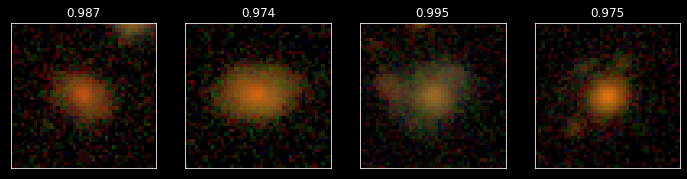

1031892485
1031865622
1031886169
1031855381


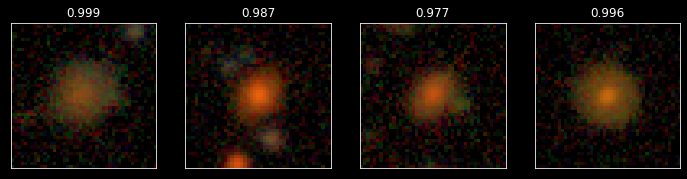

1031877024
1031893354
1031857713
1031859891


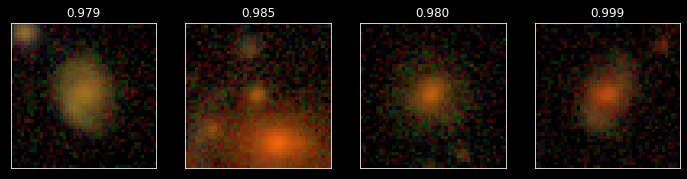

DES0000+0209.fits
24053
Found 29 single lenses in this tile.

21
1033037034
1033350534
1033045757
1033046087


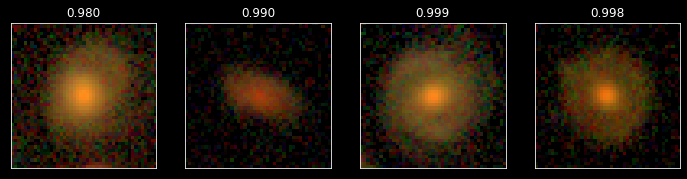

1033047870
1033360740
1033344627
1033362391


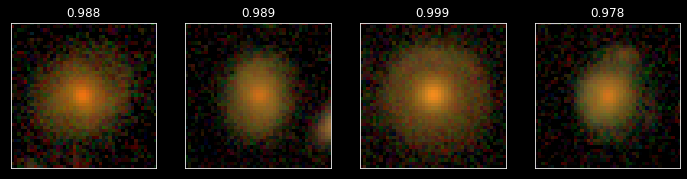

1033362023
1033061083
1033335033
1033046288


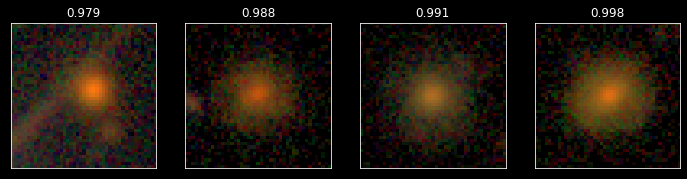

1033045843
1033364307
1033335235
1033048129


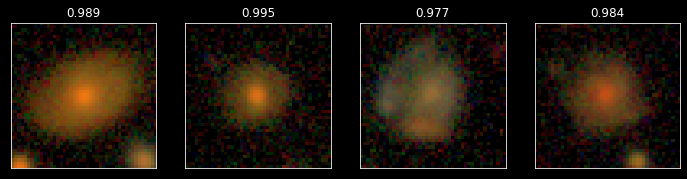

1033054151
1033056671
1033052711
1033352686


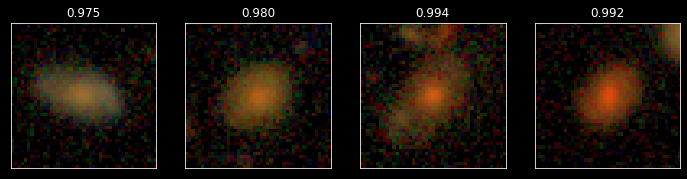

1033333417


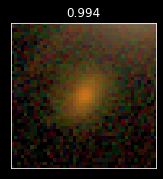

DES0000-0250.fits
23911
Found 20 single lenses in this tile.

17
1032373803
1032380961
1032367996
1032358450


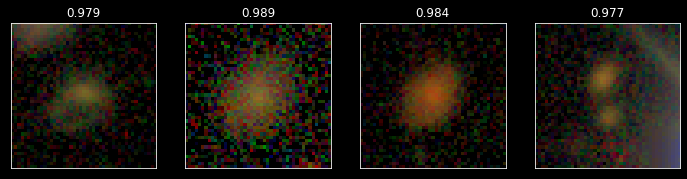

1032362195
1032379649
1032374315
1032396083


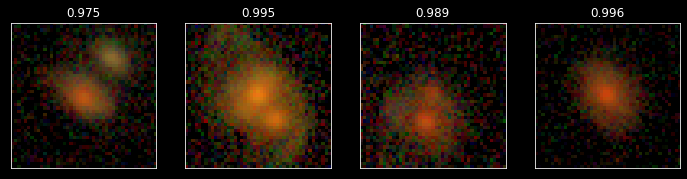

1032373898
1032357210
1032380090
1032353823


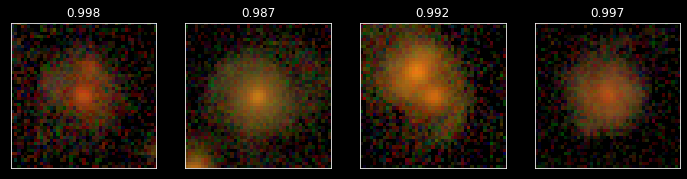

1032391846
1032384282
1032393128
1032366596


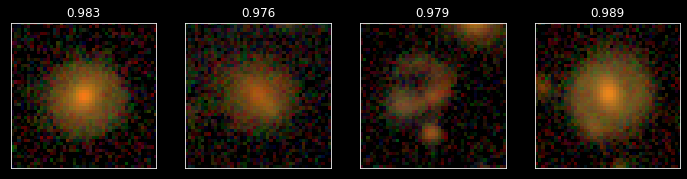

1032403596


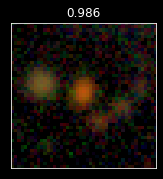

DES0000+0252.fits
22275
Found 14 single lenses in this tile.

8
1032174634
1032028703
1032169826
1032169460


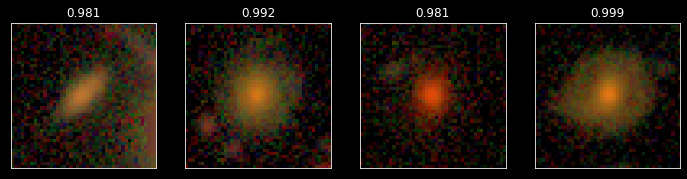

1032203687
1032193966
1032171004
1032194745


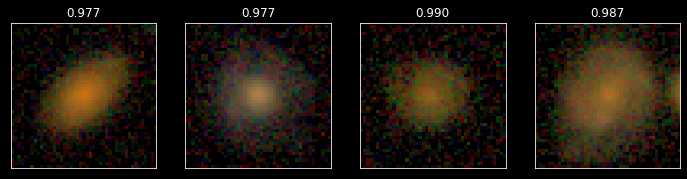

DES0000-0333.fits
24030
Found 25 single lenses in this tile.

15
1033625109
1033619458
1033625145
1033639602


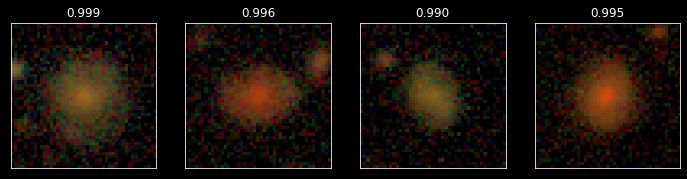

1033628503
1033635147
1033670440
1033616454


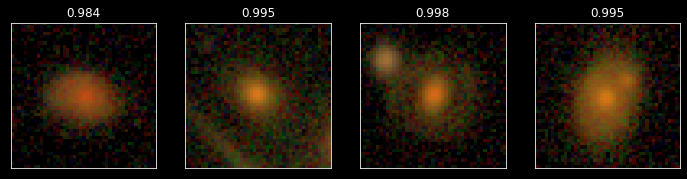

1033653464
1033634479
1033611123
1033664814


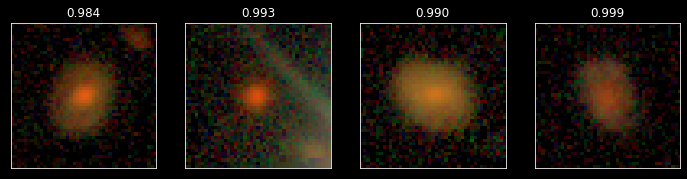

1033614687
1033627267
1033671020


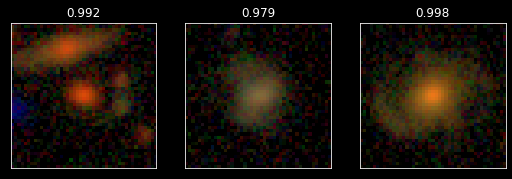

In [4]:
data = pd.read_csv('condor_files_tiles/tiles_pd.csv')
for index, row in data.iterrows():
    if(index == 5): break
    name = row['tile']
    prob_lim = 0.974
    if(not os.path.isfile('Y6_detections/' + name + '.out')):
        continue
    explore(name, prob_lim)